In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Solution

We use iterative_RL in order to solve the Problem statement

In [15]:
gamma = 1
n_games = 10000
end_points = array([[0,0] , [3,3]])

In [16]:
actions = array([[-1,0] , [1,0] , [0,1] , [0,-1]])

In [17]:
print(actions)

[[-1  0]
 [ 1  0]
 [ 0  1]
 [ 0 -1]]


In [18]:
#We now write a reward for state,action pair
def reward(state , action):
    state_x = state
    action_x = action
    reward_x = -1
    if state_x == [0,0] or state_x == [3,3]:
        return state , 0
    state_f = [0,0]
    if state_x[0] + action_x[0]>=0 and state_x[0] + action_x[0]<=3 and state_x[1] + action_x[1]>=0 and state_x[1] + action_x[1]<=3:
        state_f[0] = state_x[0] + action_x[0]
        state_f[1] = state_x[1] + action_x[1]
        return state_f , reward_x
    return state_x , reward_x
            
    

print(reward([3,0] , [1,0]))

    

([3, 0], -1)


In [22]:

q_table = np.zeros([4,4])
q_table1 = q_table
states = []
for i in range(0,4):
    for j in range(0,4):
        states.append([i,j])
print(states)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]
Wall time: 997 µs


In [23]:
%%time
#Evaluate Policy 1
exp = []
for i in range(0,n_games+1):
    q_table1 = np.copy(q_table)
    for state in states:
        q_value = 0.0
        for action in actions:
            state1 , reward1 = reward(state,action)
            #Use the formula
            q_value += (((1/4) * (reward1 + gamma*(q_table[state1[0] , state1[1]]))))
        q_table1[state[0] , state[1]] = q_value
    q_table = np.copy(q_table1)
    exp.append(q_table1)
    
            
    
    
    
    
    
    

Wall time: 2.77 s


In [24]:
print(q_table)       

[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


## Optimal Solution

The above matrix provides the optimal Solution for the problem. 

Now we plot decay for select cells

In [25]:
#Decay rate experimentation
decay = []
decay1 = []
decay2 = []
decay3 = []
for tables in range(1,len(exp)):
    decay.append(exp[tables][1][0] - exp[tables-1][1][0])
    decay1.append(exp[tables][2][0] - exp[tables-1][2][0])
    decay2.append(exp[tables][2][1] - exp[tables-1][2][1])
    decay3.append(exp[tables][1][2] - exp[tables-1][1][2])

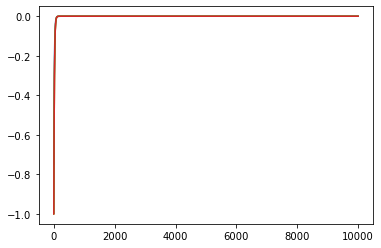

In [26]:
plt.plot(decay)
plt.plot(decay1)
plt.plot(decay2)
plt.plot(decay3)

## Observation

All the values converge to zero nearly after 1000 iterations of the game